In [18]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import keras.backend as K
import skimage.io as io
import skimage.transform as tr
import matplotlib.pyplot as plt
from glob import glob
from keras.optimizers import *
from sklearn.metrics import classification_report
from keras.models import model_from_json
%matplotlib inline

from loss_metrics import *
from helper import * 

In [14]:
# load the model
model = load_model('/Users/wohlfart/unity/BA_SceneSimulation/neural_networks/model_test.h5', custom_objects={'iou_loss': iou_loss})
#model.compile(optimizer=Adam(lr=0.0001), loss=iou_loss, metrics=['accuracy'])

ValueError: No model found in config file.

In [19]:
jsonPath = '/Users/wohlfart/unity/BA_SceneSimulation/neural_networks/model_test.json'
json_file = open(jsonPath, encoding="utf8")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
weightsPath = '/Users/wohlfart/unity/BA_SceneSimulation/neural_networks/model_test.h5'
loaded_model.load_weights(weightsPath)
print("Loaded model from disk")

Loaded model from disk


In [26]:
loaded_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
conv2d_57 (Conv2D)              (None, 224, 224, 16) 160         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_45 (BatchNo (None, 224, 224, 16) 64          conv2d_57[0][0]                  
__________________________________________________________________________________________________
conv2d_58 (Conv2D)              (None, 224, 224, 16) 2320        batch_normalization_45[0][0]     
__________________________________________________________________________________________________
batch_norm

c:\users\wohlfart\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\wohlfart\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
c:\users\wohlfart\appdata\local\programs\python\python36\lib\site-packages\skimage\util\dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


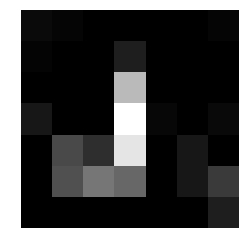

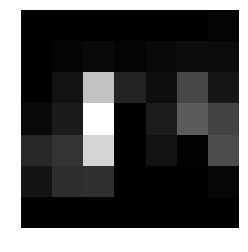

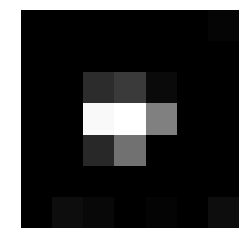

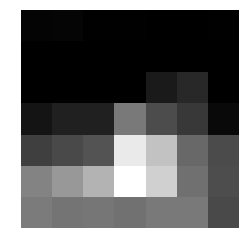

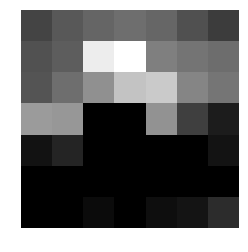

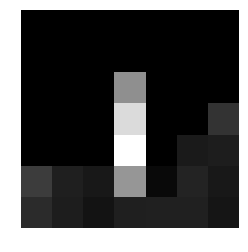

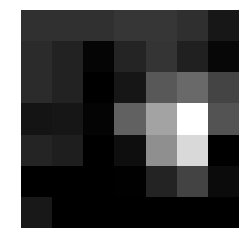

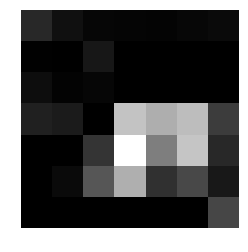

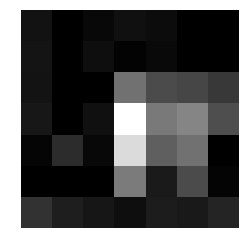

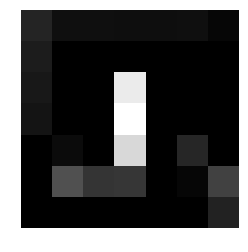

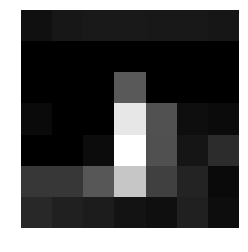

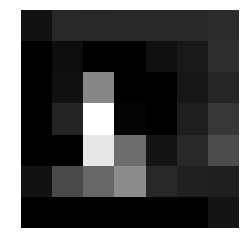

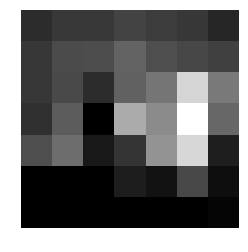

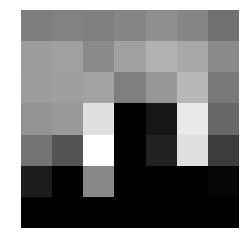

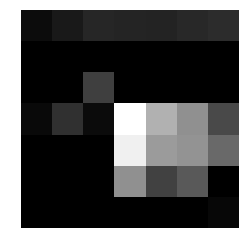

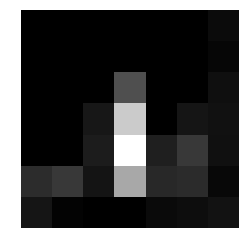

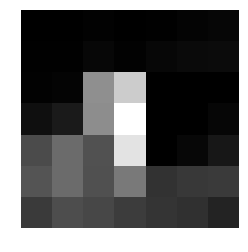

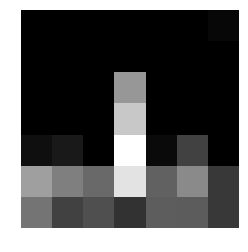

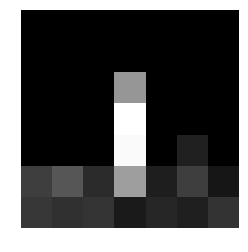

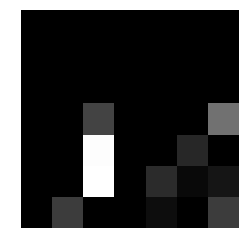

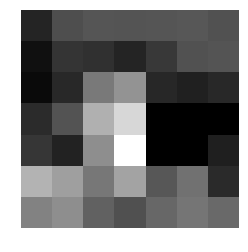

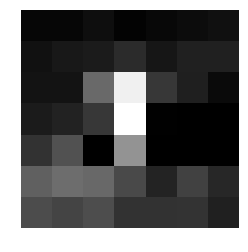

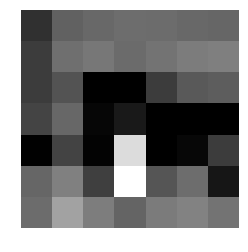

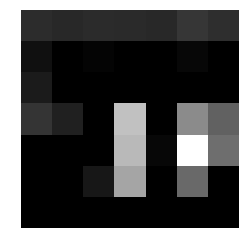

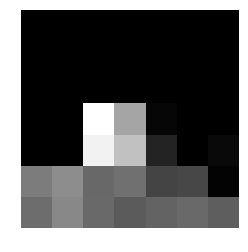

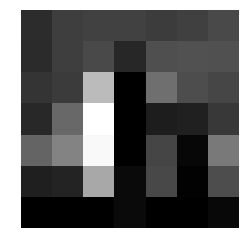

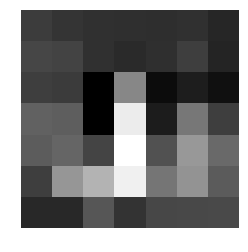

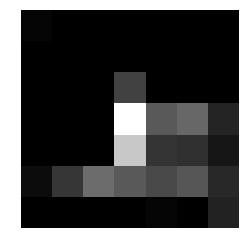

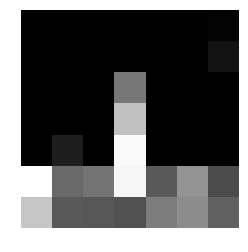

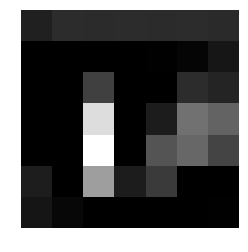

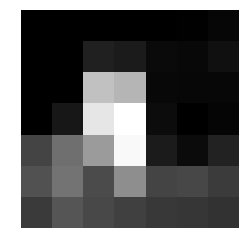

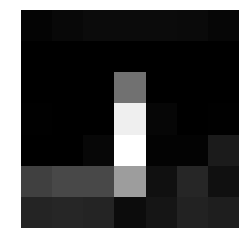

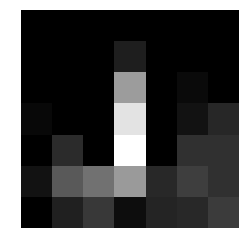

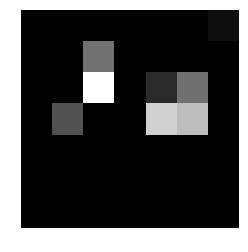

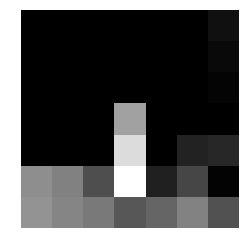

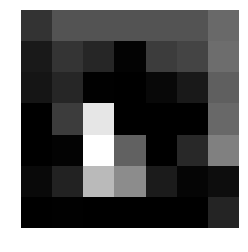

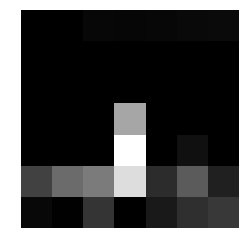

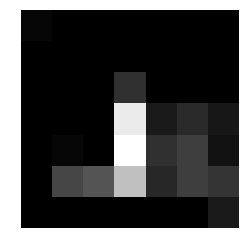

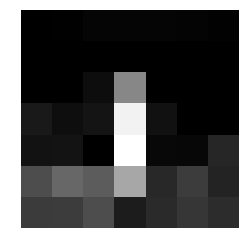

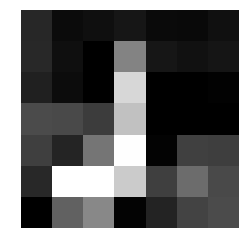

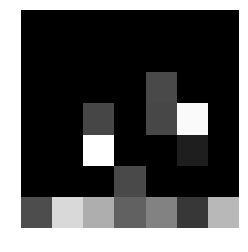

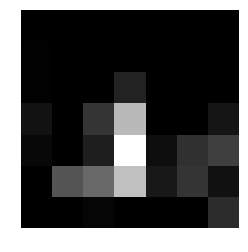

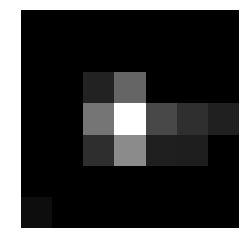

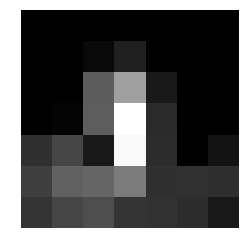

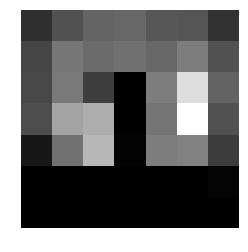

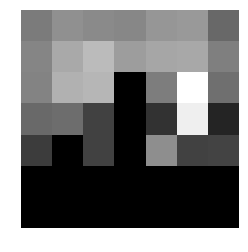

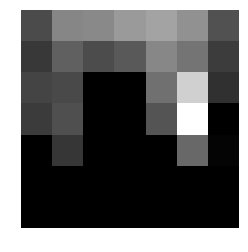

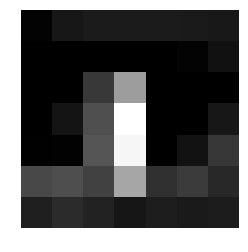

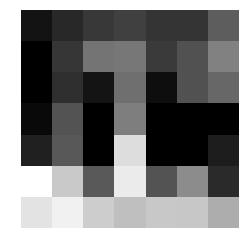

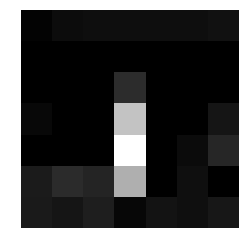

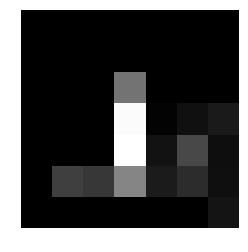

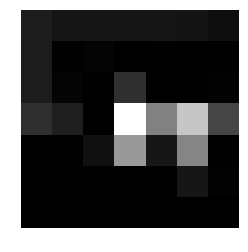

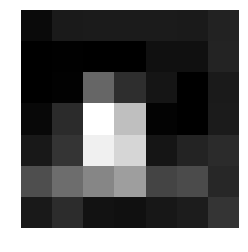

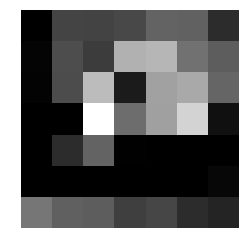

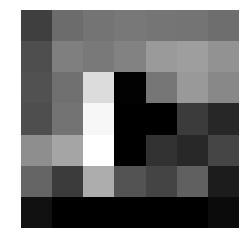

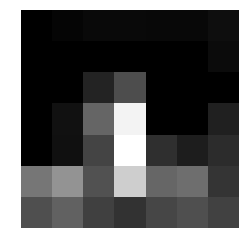

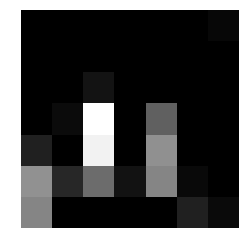

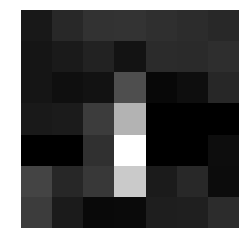

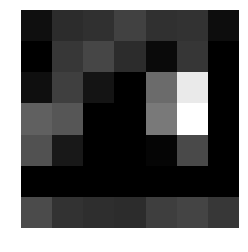

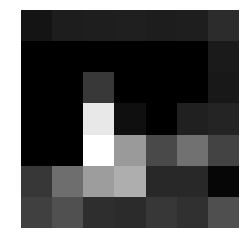

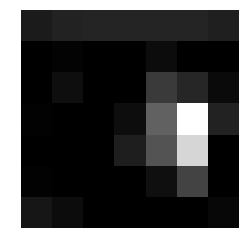

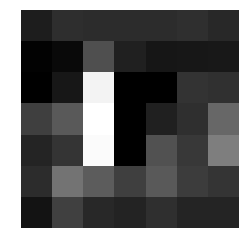

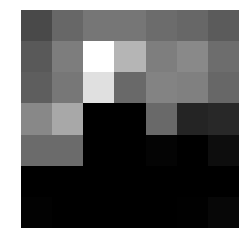

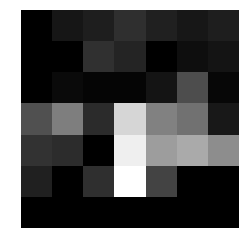

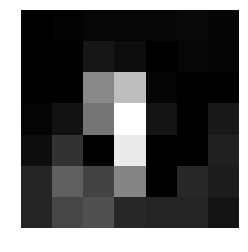

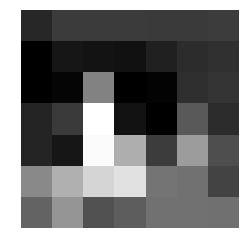

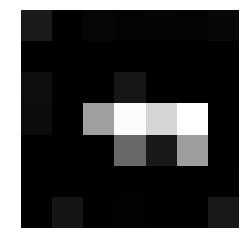

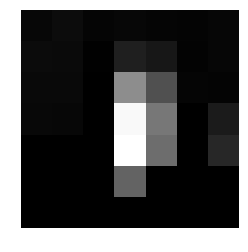

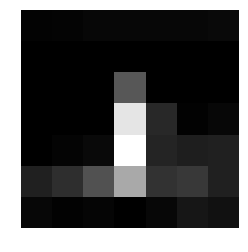

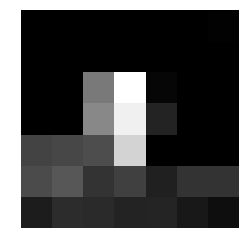

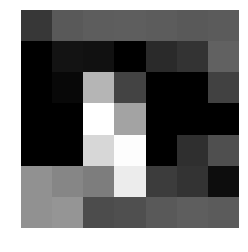

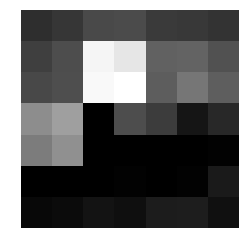

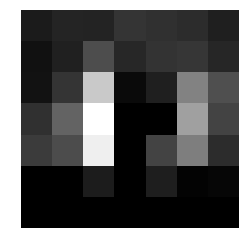

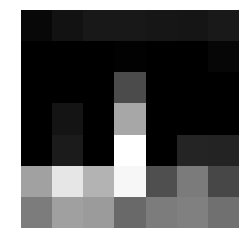

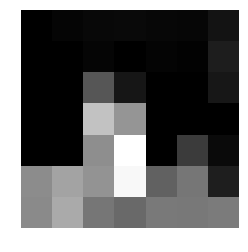

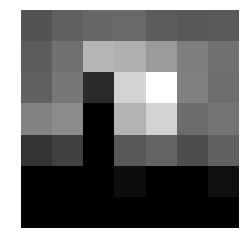

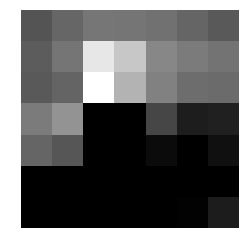

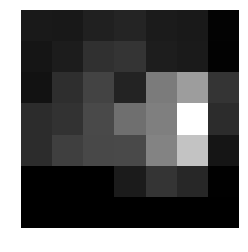

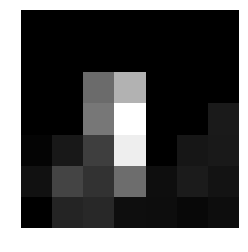

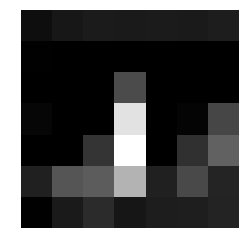

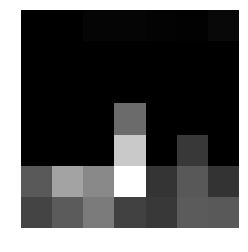

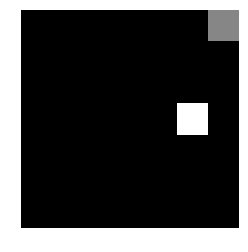

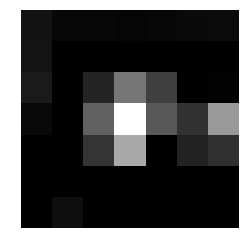

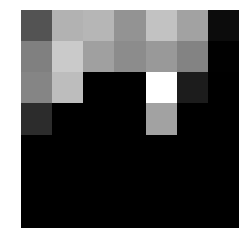

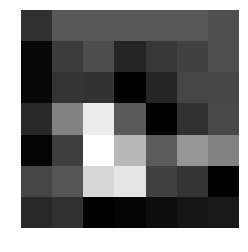

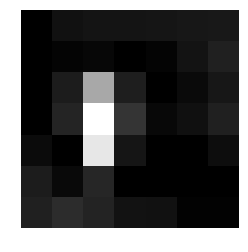

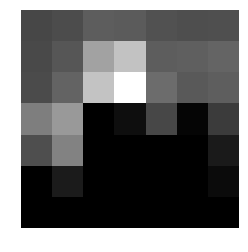

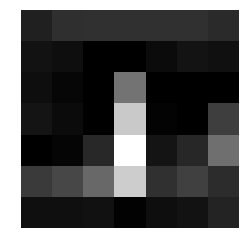

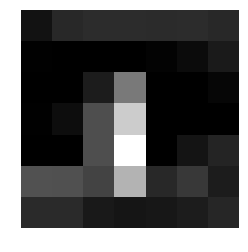

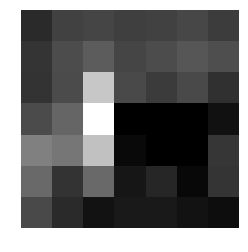

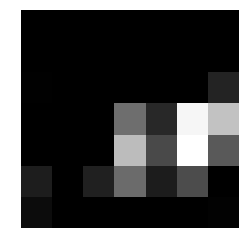

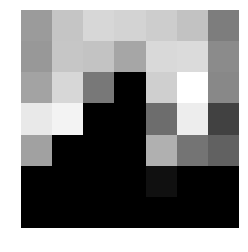

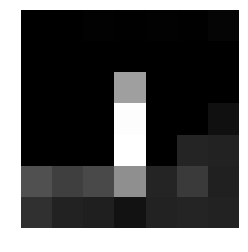

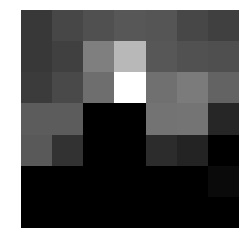

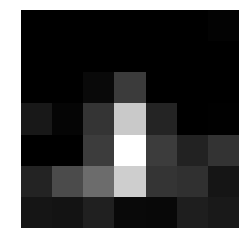

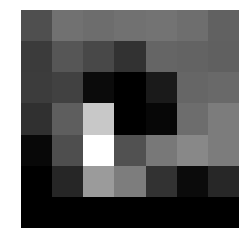

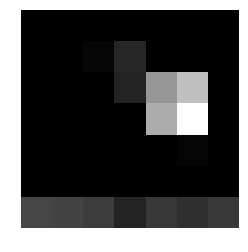

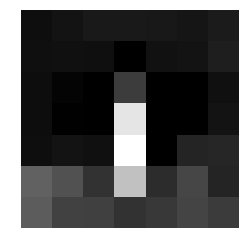

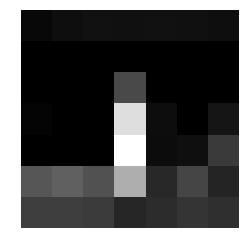

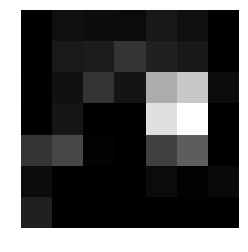

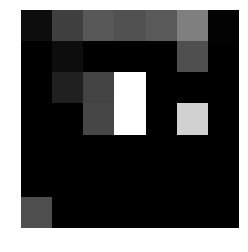

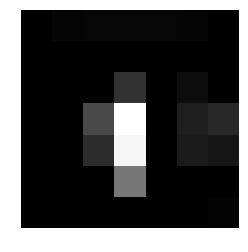

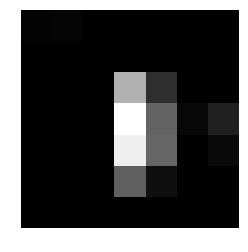

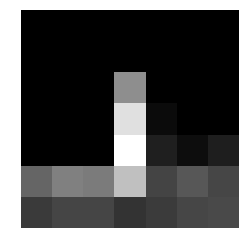

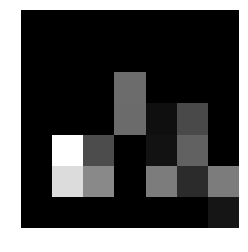

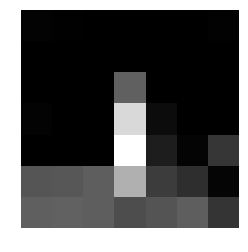

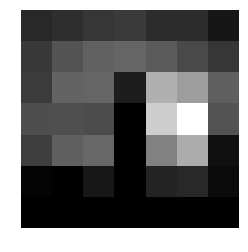

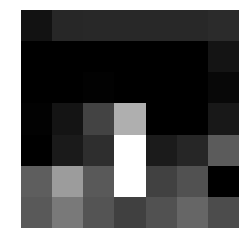

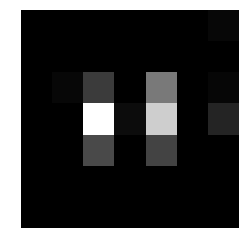

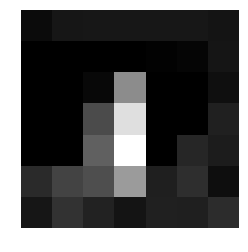

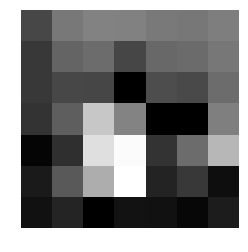

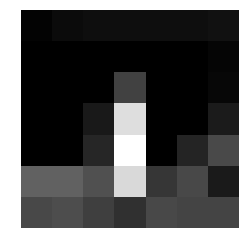

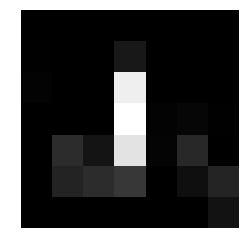

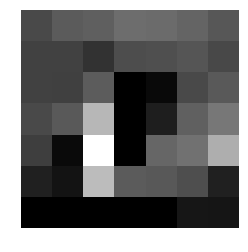

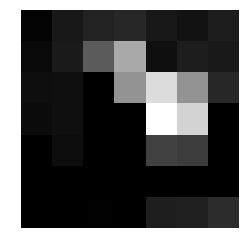

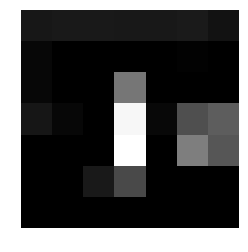

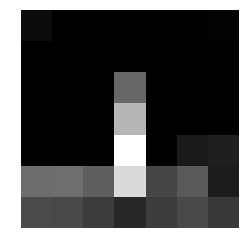

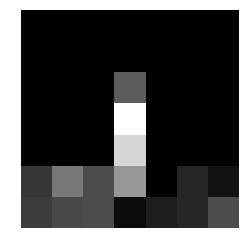

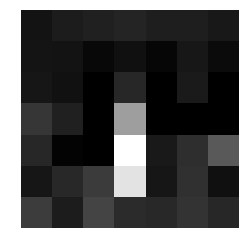

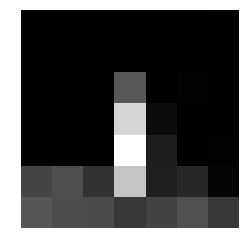

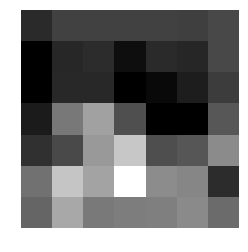

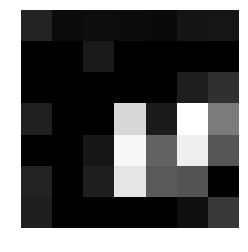

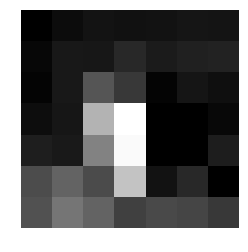

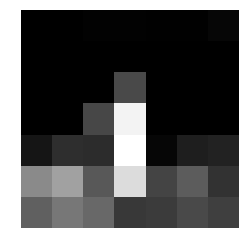

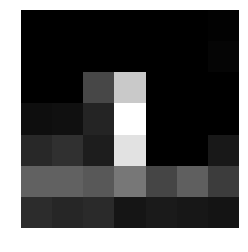

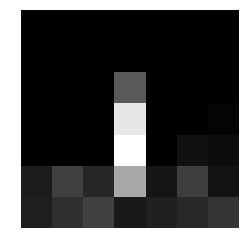

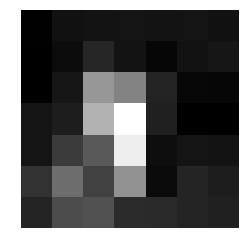

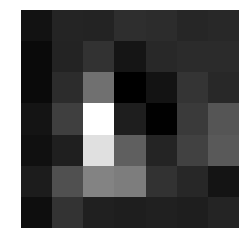

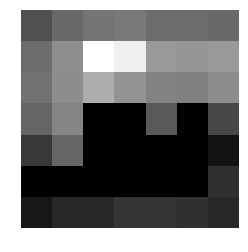

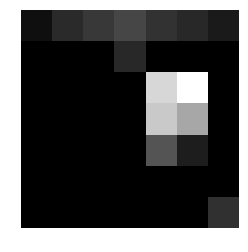

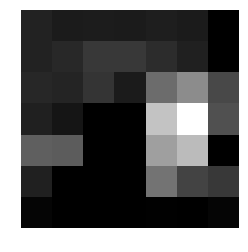

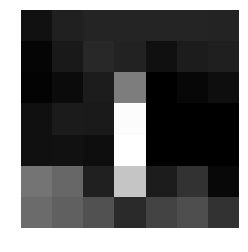

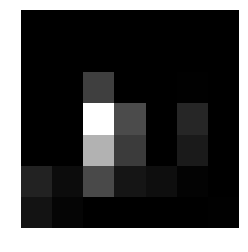

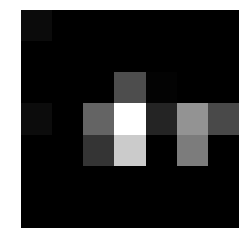

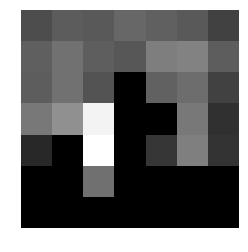

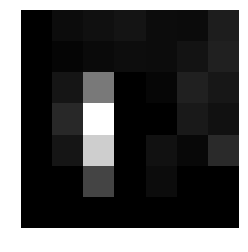

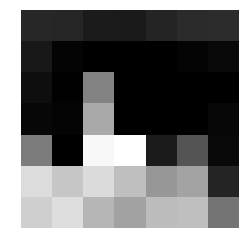

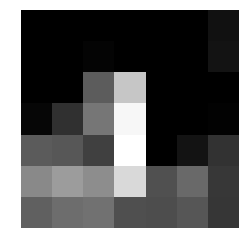

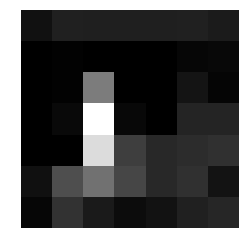

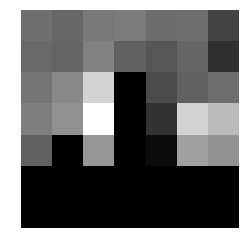

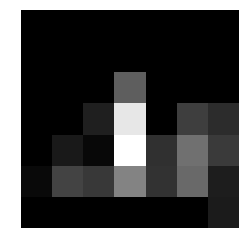

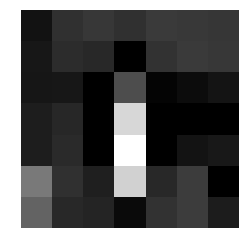

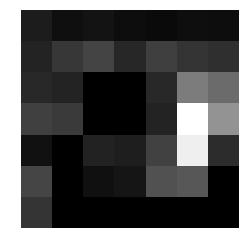

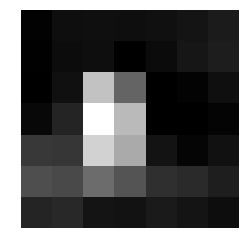

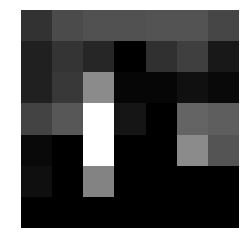

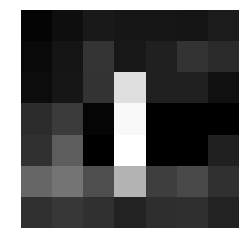

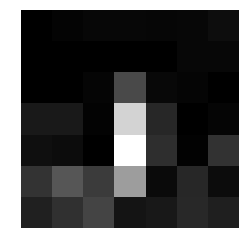

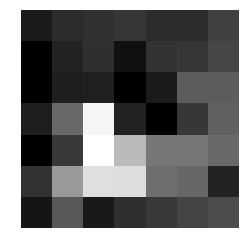

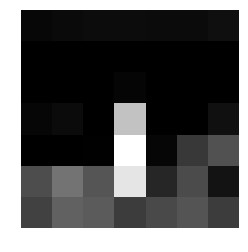

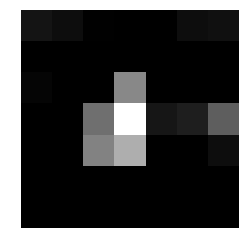

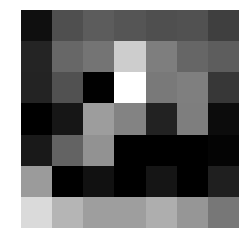

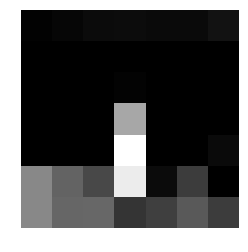

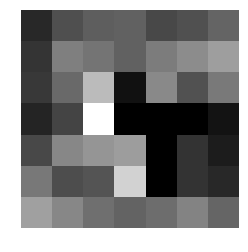

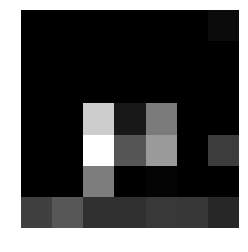

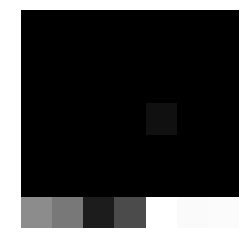

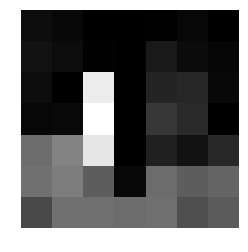

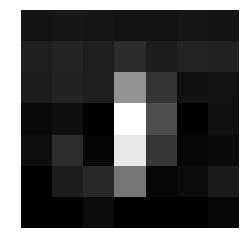

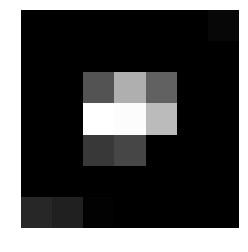

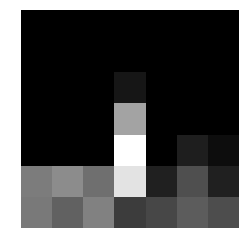

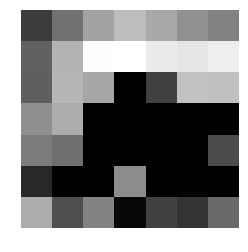

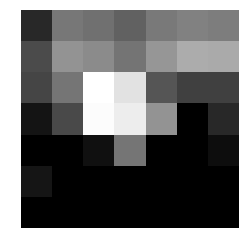

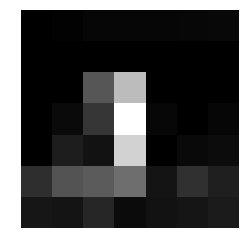

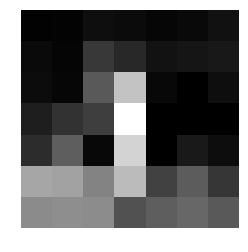

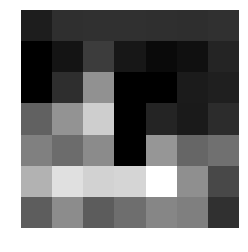

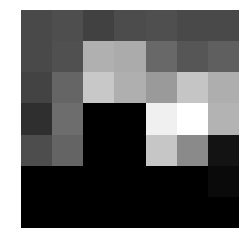

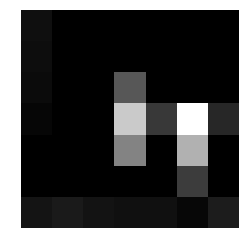

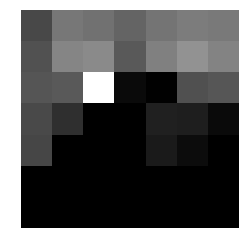

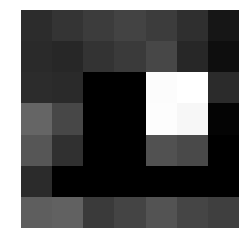

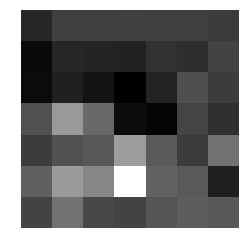

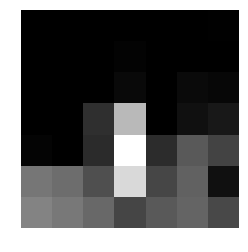

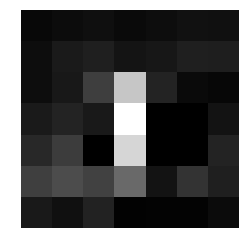

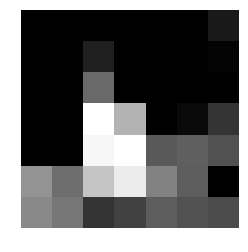

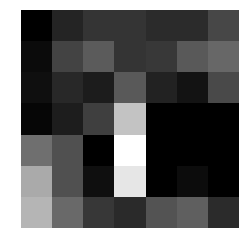

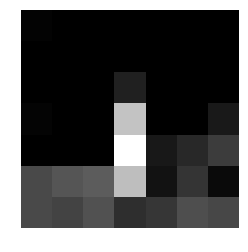

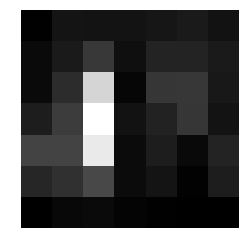

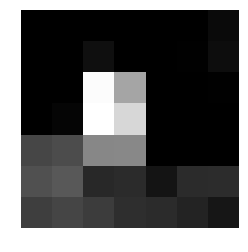

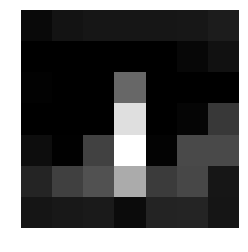

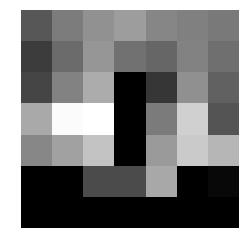

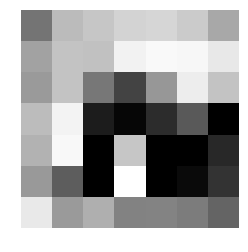

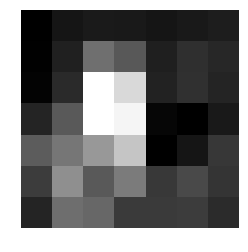

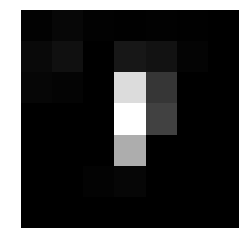

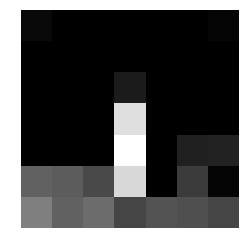

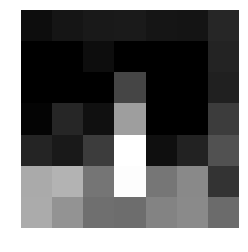

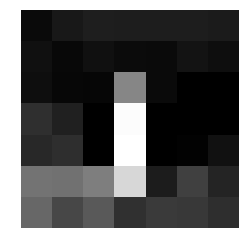

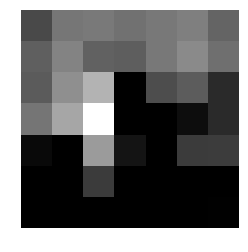

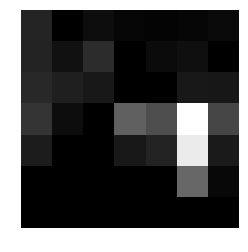

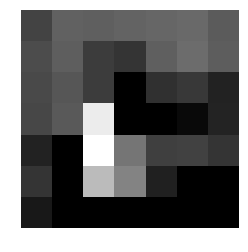

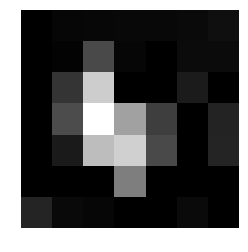

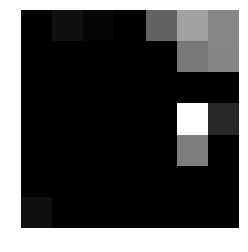

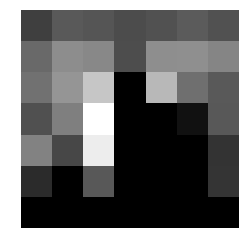

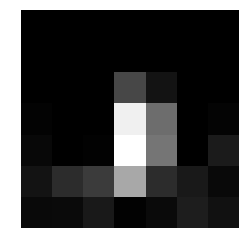

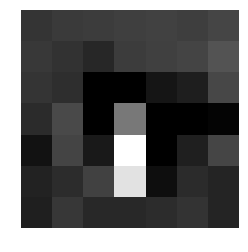

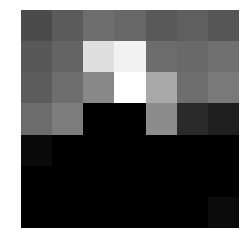

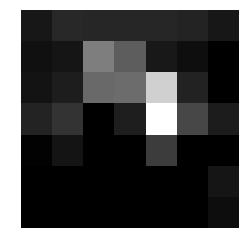

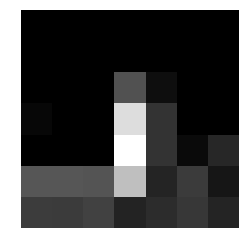

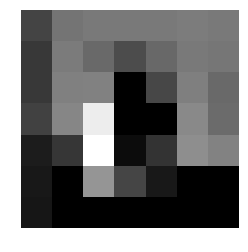

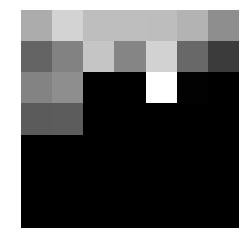

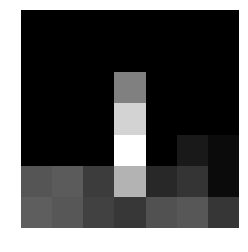

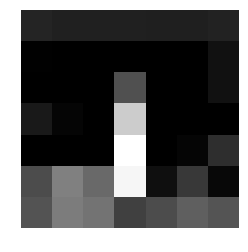

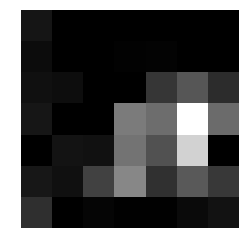

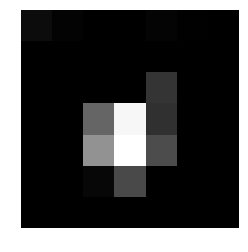

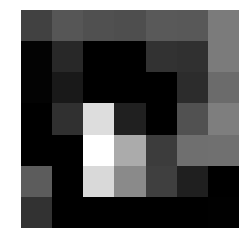

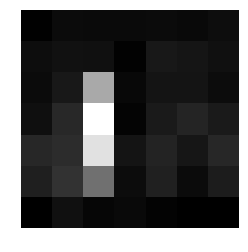

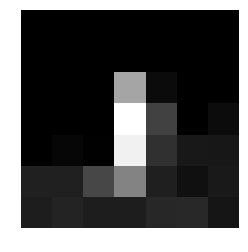

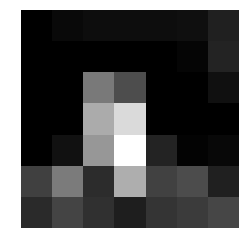

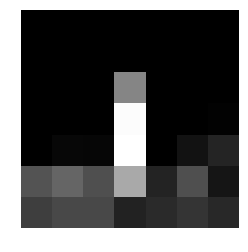

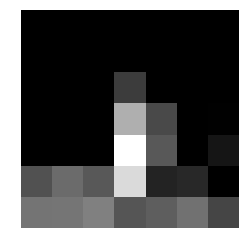

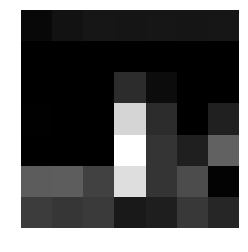

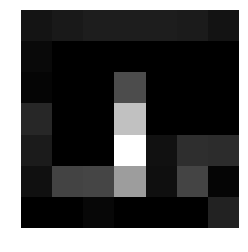

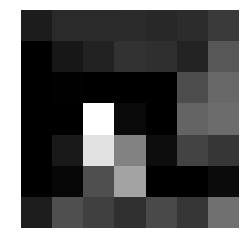

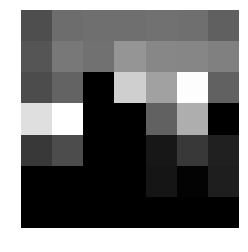

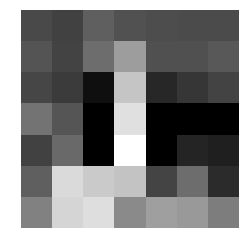

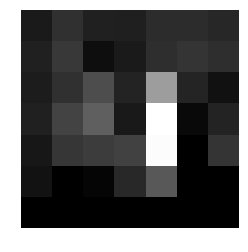

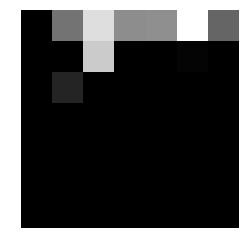

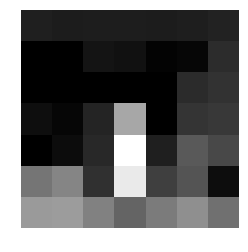

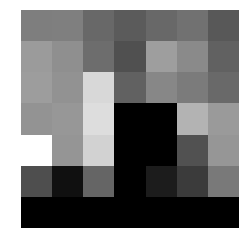

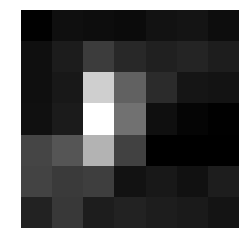

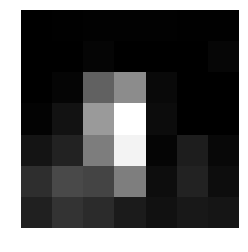

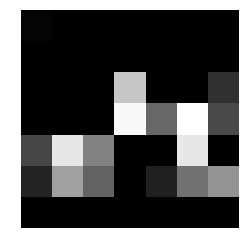

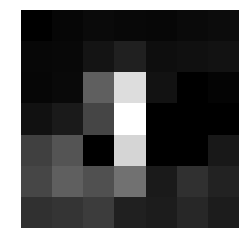

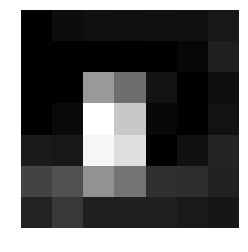

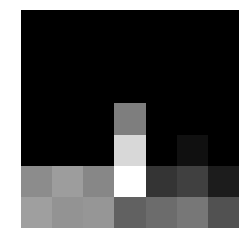

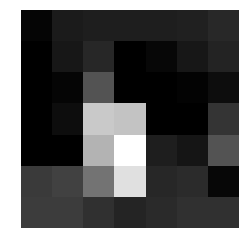

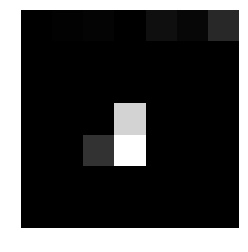

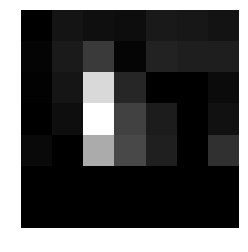

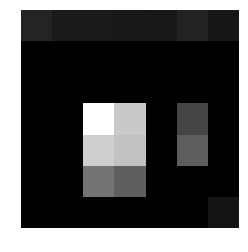

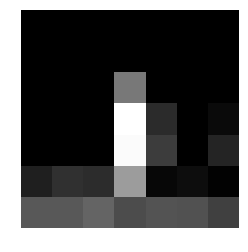

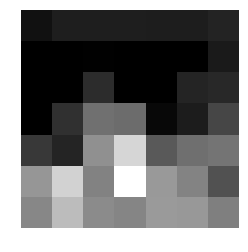

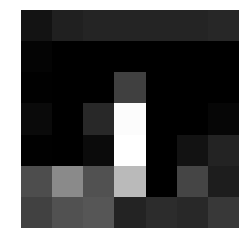

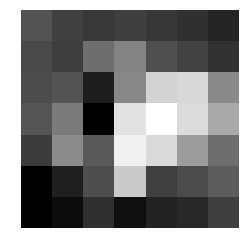

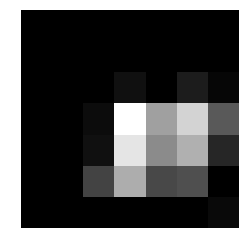

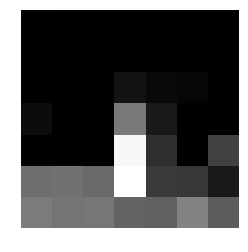

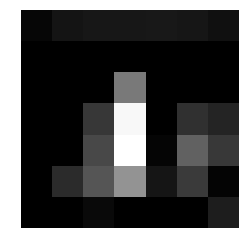

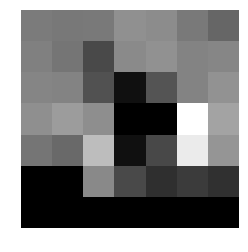

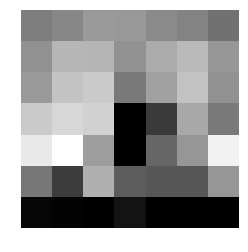

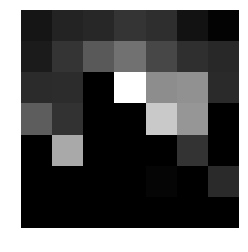

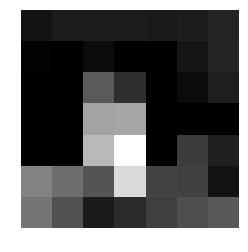

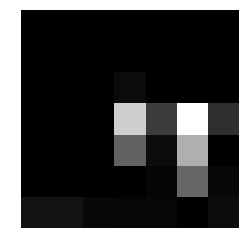

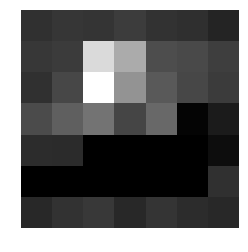

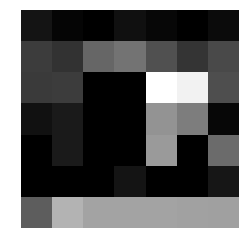

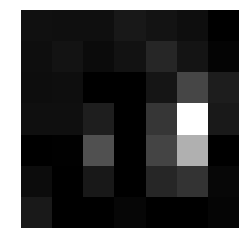

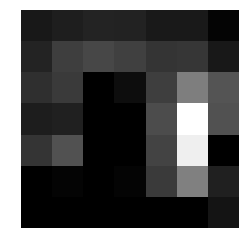

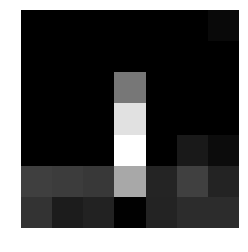

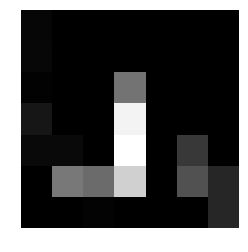

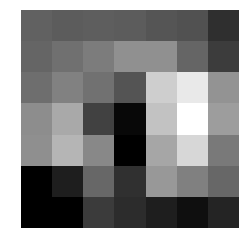

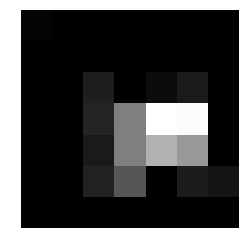

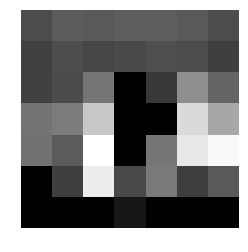

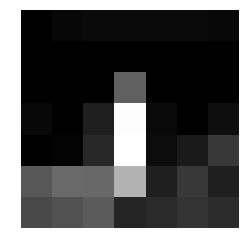

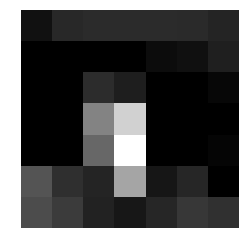

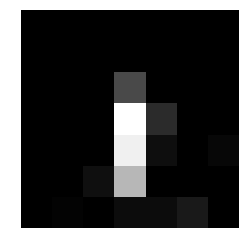

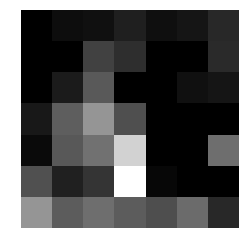

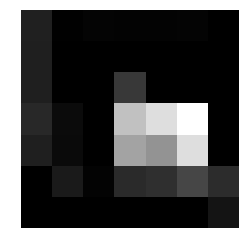

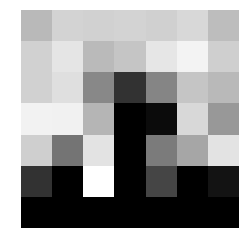

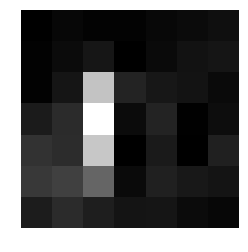

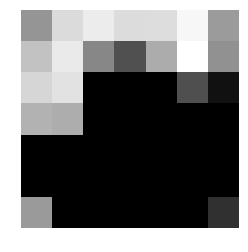

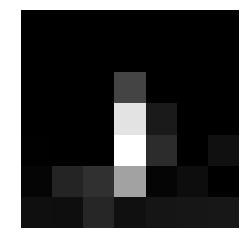

In [53]:
from keras.models import Model

layer_name = 'max_pooling2d_15'
intermediate_layer_model = Model(inputs=loaded_model.input,
                                 outputs=loaded_model.get_layer(layer_name).output)

x = read_imgs('C:/Users/wohlfart/Desktop/Datenset_Tower/train/neu/*.png', (224,224,1))


intermediate_output = intermediate_layer_model.predict(x)
i = 0
while i < 256:
    plt.imshow(intermediate_output[0][:,:,i], cmap = 'gray')
    plt.axis('off')
    plt.show()
    i+=1


In [3]:
x = None
x = read_imgs('/home/dan/Desktop/Datenset_Tower/test/images/data/*.png', (224,224,1))
y = None
y = read_imgs('/home/dan/Desktop/Datenset_Tower/test/masks/data/*.png', (224,224,1))

/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/home/dan/.conda/envs/tf-gpu/lib/python3.6/site-packages/skimage/util/dtype.py:130: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800
200
400
600
800
1000
1200
1400
1600
1800
2000
2200
2400
2600
2800
3000
3200
3400
3600
3800


In [4]:
pred = model.predict(x, verbose=1)

3922/3922 [==============================] - 18s 5ms/step


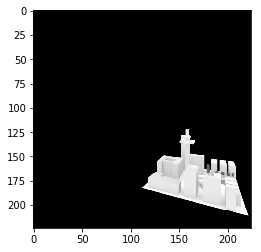

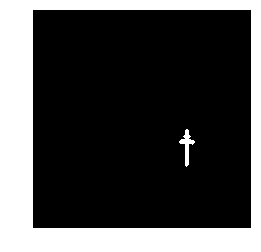

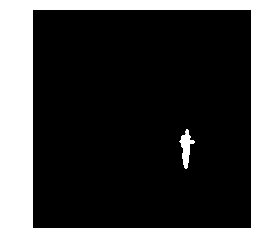

IndexError: index 1 is out of bounds for axis 2 with size 1

In [23]:
import scipy.misc
# Plots the prediction in jupyter notebook for comparison
i = 150

# Input Picture
plt.imshow(x[i, ..., 0], cmap='gray')
plt.show()

# Prediction as RGB
#plt.imshow(pred[i])
#plt.show()

# Ground Truth
plt.imshow(y[i][:,:,0], cmap = 'gray')
plt.axis('off')
plt.show()

# Prediction Dim 0
plt.imshow(pred[i][:,:,0], cmap = 'gray')
plt.axis('off')
plt.show()

# Prediction Dim 1
plt.imshow(pred[i][:,:,1], cmap = 'gray')
plt.show()

# Prediction Dim 2
plt.imshow(pred[i][:,:,2], cmap = 'gray')
plt.show()



In [17]:
model.evaluate(x ,y ,batch_size = 32,verbose=1)

3922/3922 [==============================] - 16s 4ms/step


[-0.4189567444337867, 0.9915314723738963]

In [14]:
print('DSC:       ' + str(f1_np(y, pred)))
print('IoU:       ' + str(iou_np(y, pred)))
print('Precision: ' + str(precision_np(y, pred)))
print('Recall:    ' + str(recall_np(y, pred)))
print('Error:     ' + str(error_np(y, pred)))

DSC:       0.5907045531098558
IoU:       0.41914894983936873
Precision: 0.6400522310434714
Recall:    0.5484217370854018
Error:     0.007871819726275134
